In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [91]:
#dados_doadores = pd.DataFrame(pd.read_csv('C:/Users/renato.lessa/OneDrive - PRODAM Office 365/03 - Pessoal/02 - PÓS GRADUAÇÃO/08 - Intro Machine Learnig/dataset_brutão_doadores.CSV',encoding='latin-1' ,sep=';', error_bad_lines=False))
dados_doadores = pd.DataFrame(pd.read_csv('/content/dataset_brutão_doadores.csv', encoding='latin-1' ,sep=';', error_bad_lines=False))

In [92]:
dados_doadores.shape

(235952, 28)

In [93]:
dados_doadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235952 entries, 0 to 235951
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   PACIENTE                   235952 non-null  int64 
 1   DATA                       235952 non-null  object
 2   IDADE                      235952 non-null  int64 
 3   SEXO                       235952 non-null  object
 4   ESTADO_CIVIL               235952 non-null  object
 5   ESCOLARIDADE               235952 non-null  object
 6   VINCULO_EMPREGATICIO       235952 non-null  object
 7   MOTIVO                     235952 non-null  object
 8   MOTIVACAO                  235952 non-null  object
 9   FREQUENCIA DA DOACAO       235952 non-null  object
 10  TIPO_DOACAO                235926 non-null  object
 11  TIPAGEM                    235952 non-null  object
 12  VOTO DE AUTO EXCLUSÃO      235952 non-null  object
 13  DESCARTE CONFIDENCIAL      235952 non-null  

In [94]:
#Afim de manter a maior confidencialidade possível vamos remover as colunas cep, logradouro, bairro e complemento
dados_doadores = dados_doadores.drop(columns=['LOGRADOURO', 'CEP', 'COMPLEMENTO', 'BAIRRO'])

In [95]:
#retirar colunas que necessitam de um trabalho maior de mapeamento e limpeza dos dados
dados_doadores = dados_doadores.drop(columns=['MOTIVO_INAPTIDAO', 'VINCULO_EMPREGATICIO', 'MOTIVACAO'])

In [96]:
#retirar os dados do interior do estado, pois a análise irá se restringir ao hemocentro coordenador do estado
dados_doadores.drop(dados_doadores.loc[dados_doadores['LOCAL_DA_COLETA_EXTERNA']=='INTERIOR'].index, inplace=True)

In [97]:
dados_doadores.shape

(225413, 21)

In [98]:
dados_doadores.head()

,PACIENTE,DATA,IDADE,SEXO,ESTADO_CIVIL,ESCOLARIDADE,MOTIVO,FREQUENCIA DA DOACAO,TIPO_DOACAO,TIPAGEM,VOTO DE AUTO EXCLUSÃO,DESCARTE CONFIDENCIAL,REAÇÕES ADVERSAS A DOACÃO,TRIAGEM_CLÍNICA,TRIAGEM_HEMATO,INAPTIDÃO_SOROLÓGICA,TIPO_DE_INAPTIDÃO,BOLSA_COLETADA,AFERESE,LOCAL_DA_COLETA,LOCAL_DA_COLETA_EXTERNA
0,335741,02/01/2017,62,Masculino,Casado,ENSINO MEDIO,Não Voluntário,Retorno,Dirigida,O+,NÃO,NÃO,NÃO,APTO,APTO,NÂO,-,SIM,NÃO,HEMOAM,NaN
1,14203,02/01/2017,45,Masculino,Solteiro,ENSINO MEDIO,Não Voluntário,Retorno,Agendada,O+,NÃO,NÃO,NÃO,APTO,APTO,NÂO,-,SIM,NÃO,HEMOAM,NaN
2,90149,02/01/2017,36,Masculino,Casado,ENSINO MEDIO,Não Voluntário,Retorno,Agendada,O+,NÃO,NÃO,NÃO,APTO,APTO,NÂO,-,SIM,NÃO,HEMOAM,NaN
3,578016,02/01/2017,23,Feminino,Solteiro,SUPERIOR INCOMPLETO,Volutário,Retorno,Voluntária,SEM TIPAGEM,NÃO,NÃO,NÃO,INAPTO,INAPTO,SEM CONDUTA,Provisória,NÃO,NÃO,HEMOAM,NaN
4,58767,02/01/2017,47,Masculino,Casado,ENSINO MEDIO,Volutário,Retorno,Voluntária,A+,NÃO,NÃO,NÃO,INAPTO,APTO,SEM CONDUTA,Provisória,NÃO,NÃO,HEMOAM,NaN


In [99]:
#como o interesse é em doadores da capital, onde está o hemocentro coordenador, 
#não interessa tanto saber onde ocorreu e se ocorreu coleta externa, portanto, vamos excluir tbm as colunas LOCAL_DA_COLETA e LOCAL_DA_COLETA_EXTERNA 
dados_doadores = dados_doadores.drop(columns=['LOCAL_DA_COLETA', 'LOCAL_DA_COLETA_EXTERNA'])

In [100]:
dados_doadores.shape

(225413, 19)

In [101]:
#vamos verificar se há situações que podem ter sido falha de inclusão de registros, como bolsas geradas com doadores inaptos na triagem clínica ou hematológica

#ERRO 1 = INAPTO NA TRIAGEM CLÍNICA E BOLSA COLETADA
dados_doadores.loc[(dados_doadores['TRIAGEM_CLÍNICA']=='INAPTO') & (dados_doadores['BOLSA_COLETADA']=='SIM')]
# 155 LINHAS ENCONTRADAS

,PACIENTE,DATA,IDADE,SEXO,ESTADO_CIVIL,ESCOLARIDADE,MOTIVO,FREQUENCIA DA DOACAO,TIPO_DOACAO,TIPAGEM,VOTO DE AUTO EXCLUSÃO,DESCARTE CONFIDENCIAL,REAÇÕES ADVERSAS A DOACÃO,TRIAGEM_CLÍNICA,TRIAGEM_HEMATO,INAPTIDÃO_SOROLÓGICA,TIPO_DE_INAPTIDÃO,BOLSA_COLETADA,AFERESE
1845,578500,10/01/2017,37,Feminino,União Estável,POS-GRADUADO,Não Voluntário,Primeira Vez,Dirigida,SEM TIPAGEM,NÃO,NÃO,DIFICIL ACESSO VENOSO - SEM AMOSTRAS,INAPTO,APTO,SEM CONDUTA,Provisória,SIM,NÃO
1997,578758,11/01/2017,20,Feminino,Solteiro,ENSINO MEDIO,Não Voluntário,Primeira Vez,Dirigida,O+,NÃO,NÃO,NÃO,INAPTO,APTO,NÂO,Definitiva,SIM,NÃO
3214,579377,18/01/2017,25,Feminino,Casado,SUPERIOR COMPLETO,Não Voluntário,Primeira Vez,Dirigida,SEM TIPAGEM,NÃO,NÃO,NÃO,INAPTO,APTO,SEM CONDUTA,Provisória,SIM,NÃO
3882,579631,20/01/2017,20,Masculino,Casado,SUPERIOR INCOMPLETO,Não Voluntário,Primeira Vez,Dirigida,O+,NÃO,NÃO,CONVULSAO,INAPTO,APTO,NÂO,Definitiva,SIM,NÃO
3924,88678,20/01/2017,50,Masculino,Casado,ENSINO MEDIO,Não Voluntário,Retorno,Dirigida,O+,NÃO,NÃO,NÃO,INAPTO,APTO,SEM CONDUTA,Provisória,SIM,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230916,570439,03/12/2019,20,Masculino,Solteiro,ENSINO MEDIO,Não Voluntário,Primeira Vez,Dirigida,O+,NÃO,NÃO,DIFICIL ACESSO VENOSO - SEM AMOSTRAS,INAPTO,APTO,NÂO,Definitiva,SIM,NÃO
230973,685676,04/12/2019,30,Feminino,Solteiro,SUPERIOR INCOMPLETO,Não Voluntário,Retorno,Dirigida,O+,NÃO,NÃO,PERDA DE CONSCIENCIA,INAPTO,APTO,NÂO,Definitiva,SIM,NÃO
231603,526709,06/12/2019,26,Feminino,Solteiro,SUPERIOR COMPLETO,Não Voluntário,Retorno,Dirigida,O+,NÃO,NÃO,NÃO,INAPTO,APTO,NÂO,Definitiva,SIM,NÃO
235062,1066004,26/12/2019,36,Feminino,Casado,POS-GRADUADO,Volutário,Primeira Vez,Voluntária,A+,NÃO,NÃO,OUTRAS REACOES,INAPTO,APTO,NÂO,Definitiva,SIM,NÃO


In [102]:
#ERRO 2 = INAPTO NA TRIAGEM HEMATOLÓGICA E BOLSA COLETADA
dados_doadores.loc[(dados_doadores['TRIAGEM_HEMATO']=='INAPTO') & (dados_doadores['BOLSA_COLETADA']=='SIM')]
# 0 LINHAS ENCONTRADAS

,PACIENTE,DATA,IDADE,SEXO,ESTADO_CIVIL,ESCOLARIDADE,MOTIVO,FREQUENCIA DA DOACAO,TIPO_DOACAO,TIPAGEM,VOTO DE AUTO EXCLUSÃO,DESCARTE CONFIDENCIAL,REAÇÕES ADVERSAS A DOACÃO,TRIAGEM_CLÍNICA,TRIAGEM_HEMATO,INAPTIDÃO_SOROLÓGICA,TIPO_DE_INAPTIDÃO,BOLSA_COLETADA,AFERESE


In [103]:
#ERRO 3 - IDADE MENOR QUE 18 ANOS
dados_doadores.loc[(dados_doadores['IDADE'] < 18)]

,PACIENTE,DATA,IDADE,SEXO,ESTADO_CIVIL,ESCOLARIDADE,MOTIVO,FREQUENCIA DA DOACAO,TIPO_DOACAO,TIPAGEM,VOTO DE AUTO EXCLUSÃO,DESCARTE CONFIDENCIAL,REAÇÕES ADVERSAS A DOACÃO,TRIAGEM_CLÍNICA,TRIAGEM_HEMATO,INAPTIDÃO_SOROLÓGICA,TIPO_DE_INAPTIDÃO,BOLSA_COLETADA,AFERESE
74,578006,02/01/2017,16,Feminino,Solteiro,ENSINO MEDIO,Volutário,Retorno,Voluntária,O+,NÃO,NÃO,NÃO,INAPTO,APTO,SEM CONDUTA,Provisória,NÃO,NÃO
100,577940,02/01/2017,17,Masculino,Casado,ENSINO MEDIO,Volutário,Retorno,Voluntária,A+,NÃO,NÃO,NÃO,INAPTO,APTO,SEM CONDUTA,Provisória,NÃO,NÃO
102,577941,02/01/2017,16,Feminino,Solteiro,ENSINO MEDIO,Não Voluntário,Retorno,Dirigida,SEM TIPAGEM,NÃO,NÃO,NÃO,INAPTO,INAPTO,SEM CONDUTA,Provisória,NÃO,NÃO
204,578013,02/01/2017,17,Feminino,Solteiro,ENSINO MEDIO,Não Voluntário,Retorno,Dirigida,A+,NÃO,NÃO,DIFICIL ACESSO VENOSO - COM AMOSTRAS,APTO,APTO,NÂO,-,SIM,NÃO
216,578015,02/01/2017,17,Feminino,Solteiro,ENSINO MEDIO,Não Voluntário,Primeira Vez,Dirigida,O+,NÃO,NÃO,NÃO,INAPTO,APTO,SEM CONDUTA,Provisória,NÃO,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235003,1065991,26/12/2019,17,Masculino,Solteiro,ENSINO MEDIO,Não Voluntário,Primeira Vez,Dirigida,O+,NÃO,NÃO,NÃO,APTO,APTO,NÂO,-,SIM,NÃO
235033,905205,26/12/2019,16,Masculino,Solteiro,ENSINO MEDIO,Volutário,Retorno,Voluntária,O+,NÃO,NÃO,NÃO,APTO,APTO,NÂO,-,SIM,NÃO
235284,794741,27/12/2019,17,Masculino,Solteiro,ENSINO MEDIO,Volutário,Retorno,Voluntária,A+,NÃO,NÃO,NÃO,APTO,APTO,NÂO,-,SIM,NÃO
235737,1068728,30/12/2019,16,Masculino,Solteiro,ENSINO MEDIO,Volutário,Primeira Vez,Voluntária,O+,NÃO,NÃO,NÃO,APTO,APTO,NÂO,-,SIM,NÃO


In [104]:
#ERRO 4 - IDADE MAIOR QUE 69 ANOS
dados_doadores.loc[(dados_doadores['IDADE'] > 69)]

,PACIENTE,DATA,IDADE,SEXO,ESTADO_CIVIL,ESCOLARIDADE,MOTIVO,FREQUENCIA DA DOACAO,TIPO_DOACAO,TIPAGEM,VOTO DE AUTO EXCLUSÃO,DESCARTE CONFIDENCIAL,REAÇÕES ADVERSAS A DOACÃO,TRIAGEM_CLÍNICA,TRIAGEM_HEMATO,INAPTIDÃO_SOROLÓGICA,TIPO_DE_INAPTIDÃO,BOLSA_COLETADA,AFERESE
2119,81378,12/01/2017,70,Masculino,Casado,ENSINO FUNDAMENTAL,Volutário,Retorno,Voluntária,O+,NÃO,NÃO,NÃO,APTO,APTO,NÂO,-,SIM,NÃO
20665,20166,03/04/2017,71,Masculino,Viuvo,ENSINO FUNDAMENTAL,Volutário,Retorno,Voluntária,A+,NÃO,NÃO,NÃO,INAPTO,APTO,SEM CONDUTA,Definitiva,NÃO,NÃO
24422,84233,20/04/2017,74,Masculino,Viuvo,Não definido,Não Voluntário,Retorno,Agendada,O-,NÃO,NÃO,NÃO,APTO,APTO,NÂO,-,SIM,NÃO
28329,538350,09/05/2017,70,Masculino,Divorciado,SUPERIOR COMPLETO,Não Voluntário,Retorno,Dirigida,O+,NÃO,NÃO,NÃO,APTO,APTO,NÂO,-,SIM,NÃO
29813,111148,15/05/2017,72,Masculino,Solteiro,Não definido,Não Voluntário,Retorno,Dirigida,O+,NÃO,NÃO,NÃO,INAPTO,INAPTO,SEM CONDUTA,Provisória,NÃO,NÃO
38111,15987,17/06/2017,70,Masculino,Casado,ENSINO MEDIO,Volutário,Retorno,Voluntária,A+,NÃO,NÃO,NÃO,APTO,APTO,NÂO,-,SIM,NÃO
50491,51606,14/08/2017,76,Masculino,Casado,SUPERIOR INCOMPLETO,Volutário,Retorno,Voluntária,A+,NÃO,NÃO,NÃO,APTO,APTO,NÂO,-,SIM,NÃO
58240,182474,20/09/2017,70,Masculino,Casado,ENSINO FUNDAMENTAL,Volutário,Retorno,Voluntária,O+,NÃO,NÃO,NÃO,APTO,APTO,NÂO,-,SIM,NÃO
72122,115220,24/11/2017,71,Masculino,União Estável,Não definido,Não Voluntário,Primeira Vez,Dirigida,O+,NÃO,NÃO,NÃO,INAPTO,APTO,SEM CONDUTA,Definitiva,NÃO,NÃO
72156,108232,25/11/2017,89,Masculino,Casado,Não definido,Não Voluntário,Retorno,Dirigida,O+,NÃO,NÃO,NÃO,APTO,APTO,NÂO,-,SIM,NÃO


In [105]:
#DELETA OS REGISTROS EM QUE O ERRO 1 É VERDADEIRO
dados_doadores.drop(dados_doadores.loc[(dados_doadores['TRIAGEM_CLÍNICA']=='INAPTO') & (dados_doadores['BOLSA_COLETADA']=='SIM')].index, inplace=True)

In [106]:
#DELETA OS REGISTROS EM QUE O ERRO 3 É VERDADEIRO
dados_doadores.drop(dados_doadores.loc[(dados_doadores['IDADE'] < 18)].index, inplace=True)

In [107]:
#DELETA OS REGISTROS EM QUE O ERRO 4 É VERDADEIRO
dados_doadores.drop(dados_doadores.loc[(dados_doadores['IDADE'] > 69)].index, inplace=True)

In [108]:
#DELETA OS REGISTROS EM QUE O ERRO 5 É VERDADEIRO
#dados_doadores.drop(dados_doadores.loc[(dados_doadores['MOTIVO_INAPTIDAO'] == 'PESO INSUFICIENTE') & (dados_doadores['IDADE'] >= 18)].index, inplace=True)

In [109]:
dados_doadores.shape

(223411, 19)

In [110]:
dados_doadores.head()

,PACIENTE,DATA,IDADE,SEXO,ESTADO_CIVIL,ESCOLARIDADE,MOTIVO,FREQUENCIA DA DOACAO,TIPO_DOACAO,TIPAGEM,VOTO DE AUTO EXCLUSÃO,DESCARTE CONFIDENCIAL,REAÇÕES ADVERSAS A DOACÃO,TRIAGEM_CLÍNICA,TRIAGEM_HEMATO,INAPTIDÃO_SOROLÓGICA,TIPO_DE_INAPTIDÃO,BOLSA_COLETADA,AFERESE
0,335741,02/01/2017,62,Masculino,Casado,ENSINO MEDIO,Não Voluntário,Retorno,Dirigida,O+,NÃO,NÃO,NÃO,APTO,APTO,NÂO,-,SIM,NÃO
1,14203,02/01/2017,45,Masculino,Solteiro,ENSINO MEDIO,Não Voluntário,Retorno,Agendada,O+,NÃO,NÃO,NÃO,APTO,APTO,NÂO,-,SIM,NÃO
2,90149,02/01/2017,36,Masculino,Casado,ENSINO MEDIO,Não Voluntário,Retorno,Agendada,O+,NÃO,NÃO,NÃO,APTO,APTO,NÂO,-,SIM,NÃO
3,578016,02/01/2017,23,Feminino,Solteiro,SUPERIOR INCOMPLETO,Volutário,Retorno,Voluntária,SEM TIPAGEM,NÃO,NÃO,NÃO,INAPTO,INAPTO,SEM CONDUTA,Provisória,NÃO,NÃO
4,58767,02/01/2017,47,Masculino,Casado,ENSINO MEDIO,Volutário,Retorno,Voluntária,A+,NÃO,NÃO,NÃO,INAPTO,APTO,SEM CONDUTA,Provisória,NÃO,NÃO


In [111]:
dados_doadores.insert(3, 'ANO', dados_doadores['DATA'].str.slice(start=6), allow_duplicates=False)
dados_doadores.insert(4, 'MES', dados_doadores['DATA'].str.slice(start=3,stop=5), allow_duplicates=False)
dados_doadores.insert(5, 'DIA', dados_doadores['DATA'].str.slice(start=0,stop=2), allow_duplicates=False)
dados_doadores = dados_doadores.drop(columns=['DATA'])

In [112]:
dados_doadores.head()

,PACIENTE,IDADE,ANO,MES,DIA,SEXO,ESTADO_CIVIL,ESCOLARIDADE,MOTIVO,FREQUENCIA DA DOACAO,TIPO_DOACAO,TIPAGEM,VOTO DE AUTO EXCLUSÃO,DESCARTE CONFIDENCIAL,REAÇÕES ADVERSAS A DOACÃO,TRIAGEM_CLÍNICA,TRIAGEM_HEMATO,INAPTIDÃO_SOROLÓGICA,TIPO_DE_INAPTIDÃO,BOLSA_COLETADA,AFERESE
0,335741,62,2017,01,02,Masculino,Casado,ENSINO MEDIO,Não Voluntário,Retorno,Dirigida,O+,NÃO,NÃO,NÃO,APTO,APTO,NÂO,-,SIM,NÃO
1,14203,45,2017,01,02,Masculino,Solteiro,ENSINO MEDIO,Não Voluntário,Retorno,Agendada,O+,NÃO,NÃO,NÃO,APTO,APTO,NÂO,-,SIM,NÃO
2,90149,36,2017,01,02,Masculino,Casado,ENSINO MEDIO,Não Voluntário,Retorno,Agendada,O+,NÃO,NÃO,NÃO,APTO,APTO,NÂO,-,SIM,NÃO
3,578016,23,2017,01,02,Feminino,Solteiro,SUPERIOR INCOMPLETO,Volutário,Retorno,Voluntária,SEM TIPAGEM,NÃO,NÃO,NÃO,INAPTO,INAPTO,SEM CONDUTA,Provisória,NÃO,NÃO
4,58767,47,2017,01,02,Masculino,Casado,ENSINO MEDIO,Volutário,Retorno,Voluntária,A+,NÃO,NÃO,NÃO,INAPTO,APTO,SEM CONDUTA,Provisória,NÃO,NÃO


In [113]:
dados_doadores = dados_doadores.dropna(subset=['BOLSA_COLETADA','TIPO_DOACAO'])

In [114]:
dados_doadores.shape

(223340, 21)

In [115]:
#procurando valores nulos

dados_doadores.isnull().sum()

PACIENTE                     0
IDADE                        0
ANO                          0
MES                          0
DIA                          0
SEXO                         0
ESTADO_CIVIL                 0
ESCOLARIDADE                 0
MOTIVO                       0
FREQUENCIA DA DOACAO         0
TIPO_DOACAO                  0
TIPAGEM                      0
VOTO DE AUTO EXCLUSÃO        0
DESCARTE CONFIDENCIAL        0
REAÇÕES ADVERSAS A DOACÃO    0
TRIAGEM_CLÍNICA              0
TRIAGEM_HEMATO               0
INAPTIDÃO_SOROLÓGICA         0
TIPO_DE_INAPTIDÃO            0
BOLSA_COLETADA               0
AFERESE                      0
dtype: int64

In [116]:
#dados_doadores.to_csv('C:/Users/renato.lessa/OneDrive - PRODAM Office 365/03 - Pessoal/02 - PÓS GRADUAÇÃO/08 - Intro Machine Learnig/dados_doadores.csv', index=False, encoding='ISO 8859-1', sep=';')

In [117]:
dados_doadores['ESCOLARIDADE'].unique()

array(['ENSINO MEDIO', 'SUPERIOR INCOMPLETO', 'SUPERIOR COMPLETO',
       'ENSINO FUNDAMENTAL', 'POS-GRADUADO', 'ATE A 4. SERIE',
       'Não definido', 'ENSINO PROFISSIONALIZANTE', 'MESTRADO',
       'ANALFABETO', 'DOUTORADO', 'NÃO SOUBE RESPONDER',
       'ALFABETIZAÇÃO ADULTA'], dtype=object)

In [118]:
dados_doadores['ESCOLARIDADE'].unique()

array(['ENSINO MEDIO', 'SUPERIOR INCOMPLETO', 'SUPERIOR COMPLETO',
       'ENSINO FUNDAMENTAL', 'POS-GRADUADO', 'ATE A 4. SERIE',
       'Não definido', 'ENSINO PROFISSIONALIZANTE', 'MESTRADO',
       'ANALFABETO', 'DOUTORADO', 'NÃO SOUBE RESPONDER',
       'ALFABETIZAÇÃO ADULTA'], dtype=object)

In [119]:
#alterar o valor da coluna sexo de Masculino para 1 e Feminino par 2
dados_doadores['SEXO'] = dados_doadores['SEXO'].map({'Masculino': 1, 'Feminino': 2}, na_action=None)

In [120]:
#alterar os valores da coluna estado_civil para inteiros
#1 - Casado
#2 - Solteiro
#3 - União Estável
#4 - Viuvo
#5 - Divorciado
#6 - Não definido
dados_doadores['ESTADO_CIVIL'] = dados_doadores['ESTADO_CIVIL'].map({'Casado'       : 1, 
                                                                     'Solteiro'     : 2,
                                                                     'União Estável': 3,
                                                                     'Viuvo'        : 4,
                                                                     'Divorciado'   : 5,
                                                                     'Não definido' : 6}, na_action=None)

In [121]:
dados_doadores['ESTADO_CIVIL'].unique()

array([1, 2, 3, 4, 5, 6])

In [122]:
#alterar os valores da coluna ESCOLARIDADE para inteiros
#1 - ENSINO MEDIO
#2 - SUPERIOR INCOMPLETO
#3 - SUPERIOR COMPLETO
#4 - ENSINO FUNDAMENTAL
#5 - POS-GRADUADO
#6 - ATE A 4. SERIE
#7 - Não definido
#8 - ENSINO PROFISSIONALIZANTE
#9 - MESTRADO
#10 - ANALFABETO
#11 - DOUTORADO
#12 - NÃO SOUBE RESPONDER
#13 - ALFABETIZAÇÃO ADULTA

dados_doadores['ESCOLARIDADE'] = dados_doadores['ESCOLARIDADE'].map({'ENSINO MEDIO'             : 1, 
                                                                     'SUPERIOR INCOMPLETO'      : 2,
                                                                     'SUPERIOR COMPLETO'        : 3,
                                                                     'ENSINO FUNDAMENTAL'       : 4,
                                                                     'POS-GRADUADO'             : 5,
                                                                     'ATE A 4. SERIE'           : 6,
                                                                     'Não definido'             : 7,
                                                                    'ENSINO PROFISSIONALIZANTE' : 8,
                                                                    'MESTRADO'                  : 9,
                                                                    'ANALFABETO'                : 10,
                                                                    'DOUTORADO'                 : 11,
                                                                    'NÃO SOUBE RESPONDER'       : 12,
                                                                    'ALFABETIZAÇÃO ADULTA'      : 13}, na_action=None)

In [123]:
dados_doadores['ESCOLARIDADE'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [124]:
dados_doadores['MOTIVO'].unique()

array(['Não Voluntário', 'Volutário'], dtype=object)

In [125]:
#alterar o valor da coluna MOTIVO de Volutário para 1 e Não Voluntário par 2
dados_doadores['MOTIVO'] = dados_doadores['MOTIVO'].map({'Volutário': 1, 'Não Voluntário': 2}, na_action=None)

In [126]:
dados_doadores['FREQUENCIA DA DOACAO'].unique()

array(['Retorno', 'Primeira Vez'], dtype=object)

In [127]:
#alterar o valor da coluna FREQUENCIA DA DOACAO de Retorno para 1 e Primeira Vez para 2
dados_doadores['FREQUENCIA DA DOACAO'] = dados_doadores['FREQUENCIA DA DOACAO'].map({'Retorno': 1, 'Primeira Vez': 2}, na_action=None)

In [128]:
dados_doadores['TIPO_DOACAO'].unique()

array(['Dirigida', 'Agendada', 'Voluntária', 'Convocada'], dtype=object)

In [129]:
#alterar os valores da coluna TIPO_DOACAO para inteiros
#1 - Dirigida
#2 - Agendada
#3 - Voluntária
#4 - Convocada
dados_doadores['TIPO_DOACAO'] = dados_doadores['TIPO_DOACAO'].map({'Dirigida'   : 1, 
                                                                   'Agendada'   : 2,
                                                                   'Voluntária' : 3,
                                                                   'Convocada'  : 4}, na_action=None)

In [130]:
dados_doadores['TIPAGEM'].unique()

array(['O+', 'SEM TIPAGEM', 'A+', 'O-', 'B+', 'B-', 'A-', 'AB-', 'AB+',
       'A1+', 'ON', 'A2+', 'A2B+', 'A1-', ' A+'], dtype=object)

In [131]:
#exclusão dos tipos de sangue que não existem
dados_doadores.drop(dados_doadores.loc[(dados_doadores['TIPAGEM'] == 'A1+')].index , inplace=True)
dados_doadores.drop(dados_doadores.loc[(dados_doadores['TIPAGEM'] == 'ON')].index  , inplace=True)
dados_doadores.drop(dados_doadores.loc[(dados_doadores['TIPAGEM'] == 'A2+')].index , inplace=True)
dados_doadores.drop(dados_doadores.loc[(dados_doadores['TIPAGEM'] == 'A2B+')].index, inplace=True)
dados_doadores.drop(dados_doadores.loc[(dados_doadores['TIPAGEM'] == 'A1-')].index , inplace=True) 

In [132]:
dados_doadores.shape

(223314, 21)

In [133]:
dados_doadores['TIPAGEM'].unique()

array(['O+', 'SEM TIPAGEM', 'A+', 'O-', 'B+', 'B-', 'A-', 'AB-', 'AB+',
       ' A+'], dtype=object)

In [134]:
dados_doadores.loc[dados_doadores['TIPAGEM'] == ' A+']

,PACIENTE,IDADE,ANO,MES,DIA,SEXO,ESTADO_CIVIL,ESCOLARIDADE,MOTIVO,FREQUENCIA DA DOACAO,TIPO_DOACAO,TIPAGEM,VOTO DE AUTO EXCLUSÃO,DESCARTE CONFIDENCIAL,REAÇÕES ADVERSAS A DOACÃO,TRIAGEM_CLÍNICA,TRIAGEM_HEMATO,INAPTIDÃO_SOROLÓGICA,TIPO_DE_INAPTIDÃO,BOLSA_COLETADA,AFERESE
89880,618131,32,2018,02,12,2,1,2,2,1,1,A+,NÃO,NÃO,NÃO,INAPTO,INAPTO,SEM CONDUTA,Provisória,NÃO,NÃO
95875,627659,39,2018,03,16,2,2,1,1,1,3,A+,NÃO,NÃO,NÃO,INAPTO,APTO,SEM CONDUTA,Provisória,NÃO,NÃO
210767,627659,40,2019,09,02,2,2,1,2,1,1,A+,NÃO,NÃO,NÃO,INAPTO,INAPTO,SEM CONDUTA,Provisória,NÃO,NÃO


In [135]:
#alterar os valores da coluna TIPAGEM para inteiros
#1 - A+  e ' A+' 
#2 - A-
#3 - O+
#4 - O-
#5 - B+
#6 - B-
#7 - AB+
#8 - AB-
#9 - SEM TIPAGEM

dados_doadores['TIPAGEM'] = dados_doadores['TIPAGEM'].map({' A+' : 1, 
                                                                     'A+'  : 1,
                                                                     'A-'  : 2,
                                                                     'O+'  : 3,
                                                                     'O-'  : 4,
                                                                     'B+'  : 5,
                                                                     'B-'  : 6,
                                                                     'AB+' : 7,
                                                                     'AB-' : 8,
                                                                     'SEM TIPAGEM' : 9}, na_action=None)

In [136]:
dados_doadores['TIPAGEM'].unique()

array([3, 9, 1, 4, 5, 6, 2, 8, 7])

In [137]:
dados_doadores['VOTO DE AUTO EXCLUSÃO'].unique()

array(['NÃO', 'SIM'], dtype=object)

In [138]:
#alterar os valores da coluna VOTO DE AUTO EXCLUSÃO para inteiros
#1 - SIM
#2 - NÃO
dados_doadores['VOTO DE AUTO EXCLUSÃO'] = dados_doadores['VOTO DE AUTO EXCLUSÃO'].map({'SIM' : 1, 'NÃO' : 2}, na_action=None)

In [139]:
dados_doadores['DESCARTE CONFIDENCIAL'].unique()

array(['NÃO', 'SIM'], dtype=object)

In [140]:
#alterar os valores da coluna DESCARTE CONFIDENCIAL para inteiros
#1 - SIM
#2 - NÃO
dados_doadores['DESCARTE CONFIDENCIAL'] = dados_doadores['DESCARTE CONFIDENCIAL'].map({'SIM' : 1, 'NÃO' : 2}, na_action=None)

In [141]:
dados_doadores['DESCARTE CONFIDENCIAL'].unique()

array([2, 1])

In [142]:
dados_doadores['TRIAGEM_CLÍNICA'].unique()

array(['APTO', 'INAPTO'], dtype=object)

In [143]:
#alterar os valores da coluna TRIAGEM_CLÍNICA para inteiros
#1 - APTO
#2 - INAPTO
dados_doadores['TRIAGEM_CLÍNICA'] = dados_doadores['TRIAGEM_CLÍNICA'].map({'APTO' : 1, 'INAPTO' : 2}, na_action=None)

In [144]:
#alterar os valores da coluna TRIAGEM_HEMATO para inteiros
#1 - APTO
#2 - INAPTO
dados_doadores['TRIAGEM_HEMATO'] = dados_doadores['TRIAGEM_HEMATO'].map({'APTO' : 1, 'INAPTO' : 2}, na_action=None)

In [145]:
dados_doadores['INAPTIDÃO_SOROLÓGICA'].unique()

array(['NÂO', 'SEM CONDUTA', 'SIM'], dtype=object)

In [146]:
#alterar os valores da coluna INAPTIDÃO_SOROLÓGICA para inteiros
#1 - SIM
#2 - NÃO
#3 - SEM CONDUTA
dados_doadores['INAPTIDÃO_SOROLÓGICA'] = dados_doadores['INAPTIDÃO_SOROLÓGICA'].map({'SIM' : 1, 'NÂO' : 2, 'SEM CONDUTA': 3}, na_action=None)

In [147]:
dados_doadores['REAÇÕES ADVERSAS A DOACÃO'].unique()

array(['NÃO', 'DIFICIL ACESSO VENOSO - SEM AMOSTRAS', 'OUTRAS REACOES',
       'DIFICIL ACESSO VENOSO - COM AMOSTRAS', 'FADIGA', 'PALIDEZ',
       'NAUSEAS', 'EMISSAO INVOLUNTARIA DE URINA OU FEZES',
       'SUDORESE INTENSA', 'FLEBITE', 'CONVULSAO', 'HEMATOMA',
       'PERDA DE CONSCIENCIA', 'VOMITOS'], dtype=object)

In [148]:
#alterar os valores da coluna REAÇÕES ADVERSAS A DOACÃO para inteiros
#1 - NÃO
#2 - DIFICIL ACESSO VENOSO - SEM AMOSTRAS
#3 - OUTRAS REACOES
#4 - DIFICIL ACESSO VENOSO - COM AMOSTRAS
#5 - FADIGA
#6 - PALIDEZ
#7 - NAUSEAS
#8 - EMISSAO INVOLUNTARIA DE URINA OU FEZES
#9 - SUDORESE INTENSA
#10 - FLEBITE
#11 - CONVULSAO
#12 - HEMATOMA
#13 - PERDA DE CONSCIENCIA
#14 - VOMITOS

dados_doadores['REAÇÕES ADVERSAS A DOACÃO'] = dados_doadores['REAÇÕES ADVERSAS A DOACÃO'].map({'NÃO'         : 1, 
                                                                     'DIFICIL ACESSO VENOSO - SEM AMOSTRAS'  : 2,
                                                                     'OUTRAS REACOES'                        : 3,
                                                                     'DIFICIL ACESSO VENOSO - COM AMOSTRAS'  : 4,
                                                                     'FADIGA'                                : 5,
                                                                     'PALIDEZ'                               : 6,
                                                                     'NAUSEAS'                               : 7,
                                                                    'EMISSAO INVOLUNTARIA DE URINA OU FEZES' : 8,
                                                                    'SUDORESE INTENSA'                       : 9,
                                                                    'FLEBITE'                                : 10,
                                                                    'CONVULSAO'                              : 11,
                                                                    'HEMATOMA'                               : 12,
                                                                    'PERDA DE CONSCIENCIA'                   : 13,
                                                                    'VOMITOS'                                : 14}, na_action=None)

In [149]:
dados_doadores['TIPO_DE_INAPTIDÃO'].unique()

array(['-', 'Provisória', 'Definitiva'], dtype=object)

In [150]:
#alterar os valores da coluna TIPO_DE_INAPTIDÃO para inteiros
#1 - '-' (SEM INAPTIDÕES)
#2 - Provisória
#3 - Definitiva
dados_doadores['TIPO_DE_INAPTIDÃO'] = dados_doadores['TIPO_DE_INAPTIDÃO'].map({'-' : 1, 'Provisória' : 2, 'Definitiva': 3}, na_action=None)

In [151]:
#alterar os valores da coluna BOLSA_COLETADA para inteiros
#1 - SIM
#2 - NÃO
dados_doadores['BOLSA_COLETADA'] = dados_doadores['BOLSA_COLETADA'].map({'SIM' : 1, 'NÃO' : 2}, na_action=None)

In [152]:
#alterar os valores da coluna AFERESE para inteiros
#1 - SIM
#2 - NÃO
dados_doadores['AFERESE'] = dados_doadores['AFERESE'].map({'SIM' : 1, 'NÃO' : 2}, na_action=None)

In [153]:
dados_doadores.head(90)

,PACIENTE,IDADE,ANO,MES,DIA,SEXO,ESTADO_CIVIL,ESCOLARIDADE,MOTIVO,FREQUENCIA DA DOACAO,TIPO_DOACAO,TIPAGEM,VOTO DE AUTO EXCLUSÃO,DESCARTE CONFIDENCIAL,REAÇÕES ADVERSAS A DOACÃO,TRIAGEM_CLÍNICA,TRIAGEM_HEMATO,INAPTIDÃO_SOROLÓGICA,TIPO_DE_INAPTIDÃO,BOLSA_COLETADA,AFERESE
0,335741,62,2017,01,02,1,1,1,2,1,1,3,2,2,1,1,1,2,1,1,2
1,14203,45,2017,01,02,1,2,1,2,1,2,3,2,2,1,1,1,2,1,1,2
2,90149,36,2017,01,02,1,1,1,2,1,2,3,2,2,1,1,1,2,1,1,2
3,578016,23,2017,01,02,2,2,2,1,1,3,9,2,2,1,2,2,3,2,2,2
4,58767,47,2017,01,02,1,1,1,1,1,3,1,2,2,1,2,1,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,13481,43,2017,01,02,1,2,1,1,1,3,3,2,2,1,1,1,2,1,1,2
87,427929,24,2017,01,02,1,1,1,1,1,3,3,2,2,1,1,1,2,1,1,2
94,250945,36,2017,01,02,2,2,3,2,1,1,3,2,2,1,1,1,2,1,1,2
95,379121,32,2017,01,02,1,1,2,2,1,1,1,2,2,1,1,1,2,1,1,2


In [154]:
#dados_doadores.to_csv('C:/Users/renato.lessa/OneDrive - PRODAM Office 365/03 - Pessoal/02 - PÓS GRADUAÇÃO/08 - Intro Machine Learnig/dados_doadores_2.csv', index=False, encoding='ISO 8859-1', sep=';')

In [155]:
#verificar como está a distribuição por ano
registros_ano = pd.DataFrame(dados_doadores['ANO'].value_counts())

In [156]:
registros_ano

,ANO
2017,75080
2019,74543
2018,73691


In [157]:
registros_ano = registros_ano.reset_index()

In [158]:
registros_ano

,index,ANO
0,2017,75080
1,2019,74543
2,2018,73691


In [159]:
registros_ano = registros_ano.rename(columns={'ANO': 'QTDE', })

In [160]:
registros_ano = registros_ano.rename(columns={'index': 'ANO', })

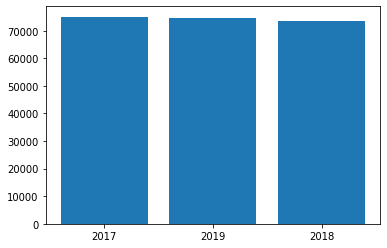

In [161]:
plt.bar(registros_ano['ANO'], registros_ano['QTDE'])
plt.show()

In [162]:
#deixar no dataset que vamos analisar, apenas os dados relacionados ao perfil do doador
doador = pd.DataFrame(dados_doadores)

In [163]:
doador.shape

(223314, 21)

In [165]:
doador = doador.drop(columns=['PACIENTE', 'ANO', 'MES', 'DIA', 'REAÇÕES ADVERSAS A DOACÃO', 'TIPO_DE_INAPTIDÃO', 'AFERESE', 'TRIAGEM_CLÍNICA', 'TRIAGEM_HEMATO', 'INAPTIDÃO_SOROLÓGICA', 'DESCARTE CONFIDENCIAL', 'VOTO DE AUTO EXCLUSÃO'])

In [166]:
doador


,IDADE,SEXO,ESTADO_CIVIL,ESCOLARIDADE,MOTIVO,FREQUENCIA DA DOACAO,TIPO_DOACAO,TIPAGEM,BOLSA_COLETADA
0,62,1,1,1,2,1,1,3,1
1,45,1,2,1,2,1,2,3,1
2,36,1,1,1,2,1,2,3,1
3,23,2,2,2,1,1,3,9,2
4,47,1,1,1,1,1,3,1,2
...,...,...,...,...,...,...,...,...,...
235947,38,2,2,3,1,1,3,3,1
235948,32,1,2,1,2,2,1,3,1
235949,38,1,1,3,1,1,3,3,1
235950,33,2,2,2,1,1,3,3,1


In [168]:
X = doador.values
y = doador['BOLSA_COLETADA'].values

X = np.delete(X, 8, axis=1)
print(X)

[[62  1  1 ...  1  1  3]
 [45  1  2 ...  1  2  3]
 [36  1  1 ...  1  2  3]
 ...
 [38  1  1 ...  1  3  3]
 [33  2  2 ...  1  3  3]
 [19  1  2 ...  1  3  3]]


In [169]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

# **Utilizando o algoritmo de árvore de decisão**

In [170]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

y_pred = dt_clf.predict(X_test);
dt_clf.score(X_test, y_test)

0.8604522725576536

In [172]:
y_pred = dt_clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[48668,     5],
       [ 9344,  8978]])

## **Utilizando o algoritmo Random Forest**

In [173]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators = 100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.8474065228748414

In [174]:
y_pred = rf_clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[47248,  1425],
       [ 8798,  9524]])

## **Utilizando o algoritmo Naive Bayes**

In [175]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_clf.score(X_test, y_test)

0.8365400403015151

In [176]:
y_pred = nb_clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[46544,  2129],
       [ 8822,  9500]])